#PAMPA Permeability, NCATS
## Binary Classification via supervised graph neural networks (GNN), transformer models. 
Based on the SMILES string of a compound, using **GNN algorithms**, and **transformer** models this tutorial explains how to predict whether it will have high permeability (1) or low-to-moderate permeability (0) in the **PAMPA assay**. 

There are different frameworks to model GNN algorithms including PyG, DGL, DeepPurpose, Tf-gnn, etc. In this tutorial, we will use **DeepPurpose** as one of the best and easiest ML frameworks in the field of drug discovery. Although PyG and Tf-GNN would provide more flexibility in modeling.

**Dataset Description:** PAMPA (parallel artificial membrane permeability assay) is a commonly employed assay to evaluate drug permeability across the cellular membrane. PAMPA is a non-cell-based, low-cost and high-throughput alternative to cellular models. Although PAMPA does not model active and efflux transporters, it still provides permeability values that are useful for absorption prediction because the majority of drugs are absorbed by passive diffusion through the membrane. 

**References:**
[1] Siramshetty, V.B., Shah, P., et al. “Validating ADME QSAR Models Using Marketed Drugs.” SLAS Discovery 2021 Dec;26(10):1326-1336. doi: 10.1177/24725552211017520.

**Dataset License:** Not Specified. CC BY 4.0.

**Dataset Statistics:** NCATS set - 2035 compounds; Approved drugs set - 142 drugs. 

###**This tutorial includes four steps:**
**Step 1:** To determine the permeability of a PAMPA compound, five state-of-the-art GNN architectures are evaluated in the first step. Then the best algorithm is selected based on some criteria including F1-Score, ROC-AUC, and PR-AUC.
The five algorithms selected include:  
* Graph Convolutional Network (`'DGL_GCN'`), Neural Fingerprint (`'DGL_NeuralFP'`), Pretrained GIN with Attribute Masking (`'DGL_GIN_AttrMasking'`), Pretrained GIN with Context Prediction(`'DGL_GIN_ContextPred'`), Attentive FP, Xiong et al. 2020 (`'DGL_AttentiveFP'`).

**Step2:** In the second step, the problem model is re-modeled using the selected model from previous step.

**Step 3:** In the third step, a transformer model will employ as the model architecture of the problem. 

**Step 4:** The results of steps 2 and 3 will save in a dictionary.


## Install packages and libraries

In [1]:
!pip install PyTDC
!pip install --pre deepchem
!pip install DeepPurpose
!pip install PubChemPy
!pip install git+https://github.com/samoturk/mol2vec
!pip install git+https://github.com/bp-kelley/descriptastorus
!pip install dgl-cu116 dglgo -f https://data.dgl.ai/wheels/repo.html
!pip install 'mordred[full]' 

# !pip install tensorflow==2.4
# !pip install gensim==3.8
# !pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 2.9 MB/s 
     |████████████████████████████████| 29.3 MB 1.9 MB/s 
  Created wheel for PyTDC: filename=PyTDC-0.3.8-py3-none-any.whl size=136139 sha256=617ab23627291112bbfeeb6f3e80feff86ff861838a5b49a1c2b1950affc7c37
  Stored in directory: /root/.cache/pip/wheels/4a/4f/da/b494dde823e311675b3ce778ca8c22e734ef8f779dbf311805
Successfully built PyTDC
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 693 kB 7.4 MB/s 
     |████████████████████████████████| 29.3 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 158 kB 6.4 MB/s 
     |████████████████████████████████| 349 kB 44.2 MB/s 
     |████████████████████████████████| 1.1 MB 44.8 MB/s 
     |█████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 8.0 MB/s 
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176721 sha256=f0aa43929198aa73afd89f1e1159037238b8106d7b177e00540d92461b9c9a3e
  Stored in directory: /root/.cache/pip/wheels/20/88/41/5d873c9b55dc7479f0b9951c2161d7b09be193e7228ea27309
Successfully built mordred


## Step 1: GNN Model Selection

Downloading...
100%|██████████| 144k/144k [00:00<00:00, 822kiB/s] 
Loading...
Done!
Found local copy...
Loading...
Done!
DGL backend not selected or invalid.  Assuming PyTorch for now.


Drug Property Prediction Mode...
in total: 2034 drugs
encoding drug...
unique drugs: 2034
Done.
Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.61581. Total time 0.00027 hours
Validation at Epoch 1 , AUROC: 0.59644 , AUPRC: 0.91973 , F1: 0.94545
Training at Epoch 2 iteration 0 with loss 0.32036. Total time 0.005 hours
Validation at Epoch 2 , AUROC: 0.60409 , AUPRC: 0.92919 , F1: 0.94545
Training at Epoch 3 iteration 0 with loss 0.38813. Total time 0.00777 hours
Validation at Epoch 3 , AUROC: 0.68387 , AUPRC: 0.95032 , F1: 0.94791
--- Go for Testing ---
Testing AUROC: 0.6873675286138193 , AUPRC: 0.8899163744415234 , F1: 0.9113233287858117
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 2034 dru

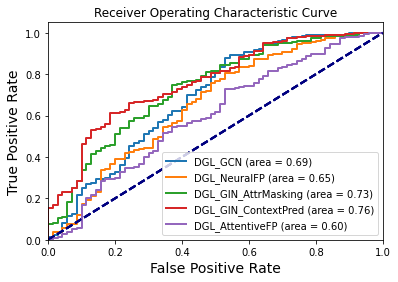

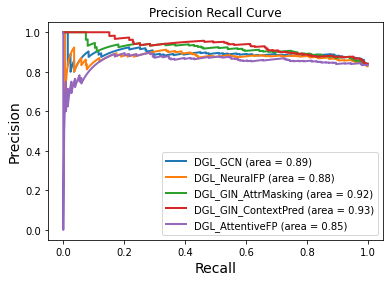

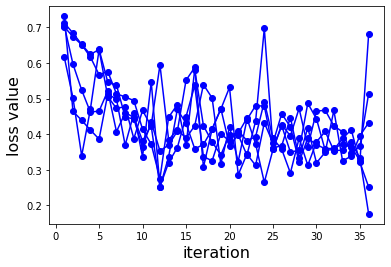

In [2]:
#@title Configurations

# import libraries
from tdc import Evaluator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DeepPurpose import utils, CompoundPred
from tdc.single_pred import ADME

# import dataset
from tdc.single_pred import ADME
data = ADME(name = 'PAMPA_NCATS').get_data(format = 'dict')

X, y = data['Drug'], data['Y']
X, y = ADME(name = 'PAMPA_NCATS').get_data(format = 'DeepPurpose')

# finetune with grid search
drug_encoding = ['DGL_GCN', 'DGL_NeuralFP', 'DGL_GIN_AttrMasking', 'DGL_GIN_ContextPred', 'DGL_AttentiveFP']

#@markdown Model parameters
for i in drug_encoding:
  train, val, test = utils.data_process(X_drug = X, 
                                        y = y, 
                                        drug_encoding = i,
                                        random_seed = 'TDC') 
  
  config = utils.generate_config(drug_encoding = i, 
                               cls_hidden_dims = [512] #@param 
                               , 
                               train_epoch = 3 #@param
                               ,
                               LR = 0.001 #@param
                               ,
                               batch_size = 128 #@param
                              )
  
  model = CompoundPred.model_initialize(**config)
  
  # Training
  model.train(train, val, test, verbose=1)
  y_pred = model.predict(test)


##Step 2: GNN Model (DGL_GIN_AttrMasking, DGL_GIN_ContextPred)

Based on the above results, DGL_GIN_AttrMasking and DGL_GIN_ContextPred performed better than the others. Consequently, we will evaluate and fine-tune our model based on these two GNN architectures in the following sections.

###Model (DGL_GIN_AttrMasking)

Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!


Drug Property Prediction Mode...
in total: 2034 drugs
encoding drug...
unique drugs: 2034
Done.
Pretrained model loaded
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.71336. Total time 0.00027 hours
Validation at Epoch 1 , AUROC: 0.52704 , AUPRC: 0.92376 , F1: 0.94270
Training at Epoch 2 iteration 0 with loss 0.34959. Total time 0.00833 hours
Validation at Epoch 2 , AUROC: 0.64480 , AUPRC: 0.94170 , F1: 0.94545
Training at Epoch 3 iteration 0 with loss 0.37817. Total time 0.01277 hours
Validation at Epoch 3 , AUROC: 0.69125 , AUPRC: 0.94927 , F1: 0.95312
Training at Epoch 4 iteration 0 with loss 0.35324. Total time 0.0175 hours
Validation at Epoch 4 , AUROC: 0.70956 , AUPRC: 0.95209 , F1: 0.95039
Training at Epoch 5 iteration 0 with loss 0.42270. Total time 0.02194 hours
Validation at Epoch 5 , AUROC: 0.71912 , AUPRC: 0.95281 , F1: 0.94488
Training at Epoch 6 iteration 0 with loss 0.39952. Total time 0.02666 hours
Validatio

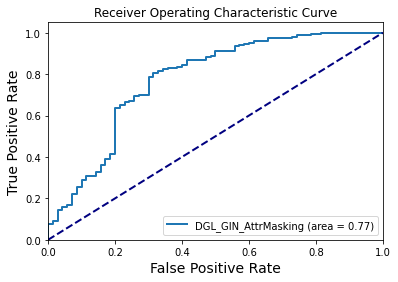

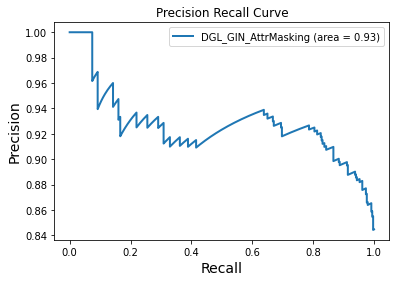

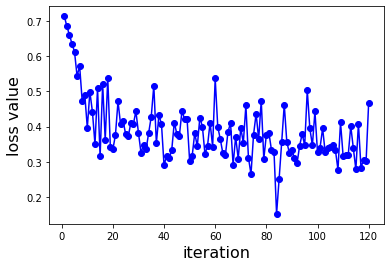

In [3]:
#@title Configurations

# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DeepPurpose import utils, CompoundPred
from tdc.single_pred import ADME
from tdc import Evaluator

# import dataset
from tdc.single_pred import ADME
data = ADME(name = 'PAMPA_NCATS').get_data(format = 'dict')
X, y = data['Drug'], data['Y']
X, y = ADME(name = 'PAMPA_NCATS').get_data(format = 'DeepPurpose')

# Input Encoder
drug_encoding = 'DGL_GIN_AttrMasking'

#preprocess and split dataset
train, val, test = utils.data_process(X_drug = X, 
                                      y = y, 
                                      drug_encoding = drug_encoding,
                                      random_seed = 'TDC')
#@markdown Model parameters
# Config Model
config = utils.generate_config(drug_encoding = drug_encoding, 
                               cls_hidden_dims = [512] #@param
                               , 
                               train_epoch = 10 #@param
                               , 
                               LR = 0.001 #@param
                               , 
                               batch_size = 128 #@param
                              )
# Initialize Model
model = CompoundPred.model_initialize(**config)

# Training
model.train(train, val, test)
y_pred = model.predict(test)
print("============================================================")


# Model evaluation
evaluator = Evaluator(name = 'ROC-AUC')
roc_auc = evaluator(test['Label'].tolist(), y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")
print("============================================================")

evaluator = Evaluator(name = 'PR-AUC')
pr_auc = evaluator(test['Label'].tolist(), y_pred)
print(f"PR-AUC: {pr_auc:.2f}")
print("============================================================")

evaluator = Evaluator(name = 'F1')
f1_score = evaluator(test['Label'].tolist(), y_pred)
print(f"F1_score: {f1_score*100:.2f}%")
print("============================================================")


In [4]:
DGL_GIN_AttrMasking_results = {
   "F1_score": f1_score,
   "ROC-AUC": roc_auc,
   "PR-AUC": pr_auc
}

##Model (DGL_GIN_ContextPred)

Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!


Drug Property Prediction Mode...
in total: 2034 drugs
encoding drug...
unique drugs: 2034
Done.
Pretrained model loaded
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.67944. Total time 0.00027 hours
Validation at Epoch 1 , AUROC: 0.59289 , AUPRC: 0.92955 , F1: 0.94270
Training at Epoch 2 iteration 0 with loss 0.34882. Total time 0.005 hours
Validation at Epoch 2 , AUROC: 0.68032 , AUPRC: 0.95032 , F1: 0.94545
Training at Epoch 3 iteration 0 with loss 0.37336. Total time 0.00972 hours
Validation at Epoch 3 , AUROC: 0.71639 , AUPRC: 0.95658 , F1: 0.94516
Training at Epoch 4 iteration 0 with loss 0.37762. Total time 0.01472 hours
Validation at Epoch 4 , AUROC: 0.71174 , AUPRC: 0.95430 , F1: 0.94429
Training at Epoch 5 iteration 0 with loss 0.27902. Total time 0.01944 hours
Validation at Epoch 5 , AUROC: 0.72431 , AUPRC: 0.95926 , F1: 0.93582
Training at Epoch 6 iteration 0 with loss 0.26294. Total time 0.02444 hours
Validation

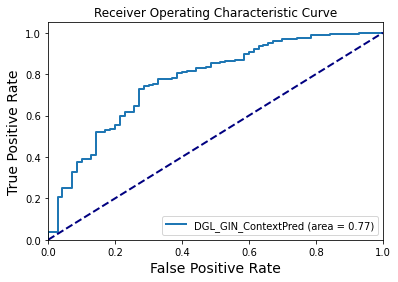

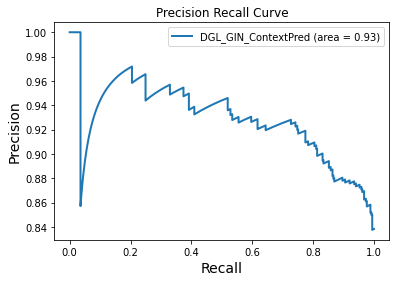

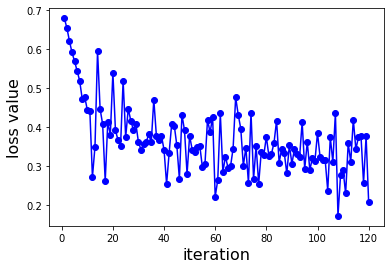

In [16]:
#@title Configurations
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DeepPurpose import utils, CompoundPred
from tdc.single_pred import ADME
from tdc import Evaluator

# import dataset
from tdc.single_pred import ADME
data = ADME(name = 'PAMPA_NCATS').get_data(format = 'dict')
X, y = data['Drug'], data['Y']
X, y = ADME(name = 'PAMPA_NCATS').get_data(format = 'DeepPurpose')

# Input Encoder
drug_encoding = 'DGL_GIN_ContextPred'

#preprocess and split dataset
train, val, test = utils.data_process(X_drug = X, 
                                      y = y, 
                                      drug_encoding = drug_encoding,
                                      random_seed = 'TDC')
#@markdown Model parameters
# Config Model
config = utils.generate_config(drug_encoding = drug_encoding, 
                               cls_hidden_dims = [512] #@param
                               , 
                               train_epoch = 10 #@param
                               , 
                               LR = 0.001 #@param
                               , 
                               batch_size = 128 #@param
                              )
# Initialize Model
model = CompoundPred.model_initialize(**config)

# Training
model.train(train, val, test)
y_pred = model.predict(test)
print("============================================================")


# Model evaluation
evaluator = Evaluator(name = 'ROC-AUC')
roc_auc = evaluator(test['Label'].tolist(), y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")
print("============================================================")

evaluator = Evaluator(name = 'PR-AUC')
pr_auc = evaluator(test['Label'].tolist(), y_pred)
print(f"PR-AUC: {pr_auc:.2f}")
print("============================================================")

evaluator = Evaluator(name = 'F1')
f1_score = evaluator(test['Label'].tolist(), y_pred)
print(f"F1_score: {f1_score*100:.2f}%")
print("============================================================")

In [17]:
DGL_GIN_ContextPred_results = {
   "F1_score": f1_score,
   "ROC-AUC": roc_auc,
   "PR-AUC": pr_auc
}

DGL_GIN_ContextPred_results

{'F1_score': 0.9139633286318759,
 'ROC-AUC': 0.769309029249682,
 'PR-AUC': 0.928692974942103}

According to the results, "**DGL_GIN_ContextPred_results**" provides the best GNN architecture. 

##Step 3: Transformer model

Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!


Drug Property Prediction Mode...
in total: 2034 drugs
encoding drug...
unique drugs: 2034
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.62942. Total time 0.00055 hours
Validation at Epoch 1 , AUROC: 0.59836 , AUPRC: 0.91916 , F1: 0.94818
Training at Epoch 2 iteration 0 with loss 0.40776. Total time 0.00833 hours
Validation at Epoch 2 , AUROC: 0.57622 , AUPRC: 0.92921 , F1: 0.94818
Training at Epoch 3 iteration 0 with loss 0.39385. Total time 0.01611 hours
Validation at Epoch 3 , AUROC: 0.55778 , AUPRC: 0.91995 , F1: 0.94818
Training at Epoch 4 iteration 0 with loss 0.39226. Total time 0.02361 hours
Validation at Epoch 4 , AUROC: 0.52827 , AUPRC: 0.92022 , F1: 0.94818
Training at Epoch 5 iteration 0 with loss 0.39558. Total time 0.03138 hours
Validation at Epoch 5 , AUROC: 0.50505 , AUPRC: 0.90074 , F1: 0.94818
Training at Epoch 6 iteration 0 with loss 0.40917. Total time 0.03916 hours
Validation at Epoch 6 , AUROC: 0

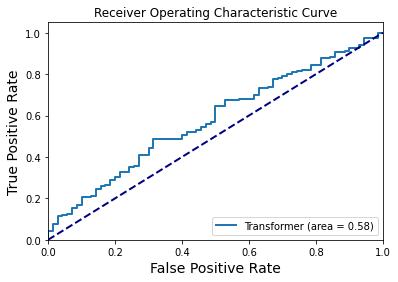

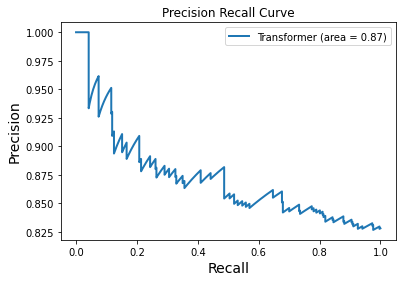

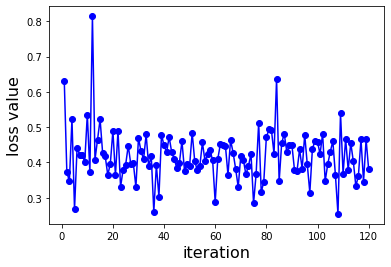

In [7]:
#@title Configurations
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DeepPurpose import utils, CompoundPred
from tdc.single_pred import ADME

# import dataset
from tdc.single_pred import ADME
data = ADME(name = 'PAMPA_NCATS').get_data(format = 'dict')
X, y = data['Drug'], data['Y']
X, y = ADME(name = 'PAMPA_NCATS').get_data(format = 'DeepPurpose')

# Input Encoder
drug_encoding = 'Transformer'

#preprocess and split dataset
train, val, test = utils.data_process(X_drug = X, 
                                      y = y, 
                                      drug_encoding = drug_encoding,
                                      random_seed = 'TDC')
#@markdown Model parameters
# Config Model
config = utils.generate_config(drug_encoding = drug_encoding, 
                               cls_hidden_dims = [512] #@param
                               , 
                               train_epoch = 10 #@param
                               , 
                               LR = 0.001 #@param
                               , 
                               batch_size = 128 #@param
                              )
# Initialize Model
model = CompoundPred.model_initialize(**config)

# Training
model.train(train, val, test)
y_pred = model.predict(test)
print("============================================================")


# Model evaluation
evaluator = Evaluator(name = 'ROC-AUC')
roc_auc = evaluator(test['Label'].tolist(), y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")
print("============================================================")

evaluator = Evaluator(name = 'PR-AUC')
pr_auc = evaluator(test['Label'].tolist(), y_pred)
print(f"PR-AUC: {pr_auc:.2f}")
print("============================================================")

evaluator = Evaluator(name = 'F1')
f1_score = evaluator(test['Label'].tolist(), y_pred)
print(f"F1_score: {f1_score*100:.2f}%")
print("============================================================")

In [14]:
Transformer_results = {
   "F1_score": f1_score,
   "ROC-AUC": roc_auc,
   "PR-AUC": pr_auc
}

Transformer_results

{'F1_score': 0.9059139784946236,
 'ROC-AUC': 0.5787621873675286,
 'PR-AUC': 0.8725111761661228}

## Step 4: Models performance comparison

In [40]:
import pandas as pd

XGBClassifier_results = {
    'F1_score': 0.9209809264305178,
    'ROC-AUC': 0.5728163992869875,
    'PR-AUC': 0.857747846206573
    }

models_results = pd.DataFrame.from_dict([XGBClassifier_results, DGL_GIN_ContextPred_results, Transformer_results])
models_results['F1_score'] = (models_results['F1_score'] * 1).round(2)
models_results.index = ['XGBClassifier_results', 'DGL_GIN_ContextPred_results', 'Transformer_results']
models_results

,F1_score,ROC-AUC,PR-AUC
XGBClassifier_results,0.92,0.572816,0.857748
DGL_GIN_ContextPred_results,0.91,0.769309,0.928693
Transformer_results,0.91,0.578762,0.872511


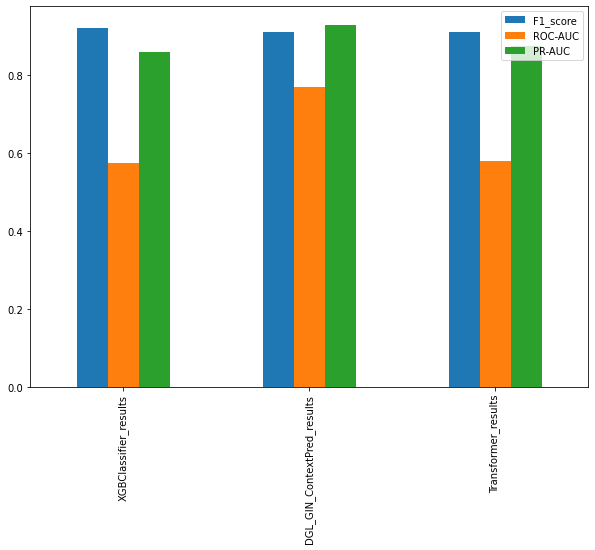

In [39]:
models_results.plot(kind='bar', figsize=(10, 7))
plt.savefig('Chart.png')

In [38]:
name = ['XGBClassifier_results', 'DGL_GIN_ContextPred_results', 'Transformer_results']
results = [
    {
    'F1_score': 0.9209809264305178,
    'ROC-AUC': 0.5728163992869875,
    'PR-AUC': 0.857747846206573
    },

    {
    'F1_score': 0.9139633286318759,
    'ROC-AUC': 0.769309029249682,
    'PR-AUC': 0.928692974942103
    },

    {
    'F1_score': 0.9059139784946236,
    'ROC-AUC': 0.5787621873675286,
    'PR-AUC': 0.8725111761661228
    }]
